# Regression Analysis

Regression is a statistical method used in finance, investing, and other disciplines that attempts to determine the strength and character of the relationship between one dependent variable (usually denoted by Y) and a series of other variables (known as independent variables).

Regression helps investment and financial managers to value assets and understand the relationships between variables, such as commodity prices and the stocks of businesses dealing in those commodities.

(Ref: https://www.investopedia.com/terms/r/regression.asp#:~:text=What%20Is%20Regression%3F,(known%20as%20independent%20variables). )

<b>Example:</b>
- House prices: Larger the house Higher the price 
  - Size  : Explanatory variable (x)
  - Price : Dependant variable (y)
  - Basically if we know the size of the house, we can expect the price of the house 
  
<b>Regression Types</b>
1. Simple Regression : One variable (linear equation)
$$
y = \alpha + \beta x
$$
  - y : dependent
  - x : explanatory (independent)
  - <b>NOTE:</b> Simple regression uses only one variable therefore its estimations will not be accurate, therefore we can present it like :     
    $$
    y = \alpha + \beta x + error
    $$
    error is also called 'residuals'    
  

2. Multivariate regression: More than one variable


  

In [1]:
import numpy as np
import pandas as pd

from scipy import stats
import statsmodels.api as sm

import matplotlib.pyplot as plt

data = pd.read_excel('samplefiles/HousesOnSale.xlsx')
data 

,House Price,House Size,State,City
0,590000,900,ON,Toronto
1,600000,1000,ON,Toronto
2,670000,1150,ON,Toronto
3,750000,1100,ON,Toronto
4,800000,1300,ON,Toronto
5,850000,2150,ON,Toronto
6,900000,1050,ON,Toronto
7,970000,1300,ON,Toronto
8,1000000,1900,ON,Toronto
9,1050000,1700,ON,Toronto


In [7]:
data[['House Price', 'House Size']] # get list which will have index, house price, house size columns

,House Price,House Size
0,590000,900
1,600000,1000
2,670000,1150
3,750000,1100
4,800000,1300
5,850000,2150
6,900000,1050
7,970000,1300
8,1000000,1900
9,1050000,1700


### Univariate Regression

In [4]:
# explanatory variable
x = data['House Size']
# dependent variable
y = data['House Price']
print(x)
print(y)

0      900
1     1000
2     1150
3     1100
4     1300
5     2150
6     1050
7     1300
8     1900
9     1700
10    1900
11    1600
12    2275
13    2100
Name: House Size, dtype: int64
0      590000
1      600000
2      670000
3      750000
4      800000
5      850000
6      900000
7      970000
8     1000000
9     1050000
10    1050000
11    1150000
12    1200000
13    1300000
Name: House Price, dtype: int64


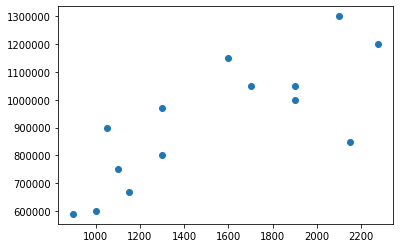

In [5]:
plt.scatter(x,y)
plt.show()

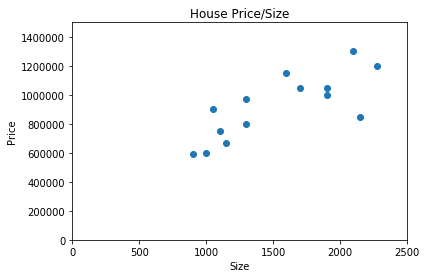

In [6]:
plt.scatter(x,y)
plt.axis([0,2500,0,1500000])  # plot axis start from 0,0 to  2500,1500000
plt.title('House Price/Size')
plt.ylabel('Price')
plt.xlabel('Size')
plt.show()

In [14]:
x1 = sm.add_constant(x)
# Ordinary Least Squares : https://financetrain.com/ordinary-least-squares-ols
regression = sm.OLS(y,x1).fit()
regression.summary()

# in the results, R-squared (should be 0.612 based on 
# the sample file) means, 61.2% of the results can ve explanaed 
# with the explanatory variable we used which is the House Price)
# So, because of 61% is a high number, this is a good model 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            House Price   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     18.91
Date:                Mon, 03 Aug 2020   Prob (F-statistic):           0.000948
Time:                        23:29:04   Log-Likelihood:                -185.07
No. Observations:                  14   AIC:                             374.1
Df Residuals:                      12   BIC:                             375.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.588e+05   1.35e+05      2.664      0.021    6.54e+04    6.52e+05
House Size   366.6958     84.334      4.348      0.001     182.949     550.443
==============================================================================
Omnibus:                        0.513   Durbin-Watson:                   1.818
Prob(Omnibus):                  0.774   Jarque-Bera (JB):                0.300
Skew:                          -0.321   Prob(JB):                        0.861
Kurtosis:                       2.681   Cond. No.                     5.59e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Measuring how predictable is a regression test: 

- Are all regressions created equal ?
  - They are not all equal
  - Some of the explanatory variables are better at predicting other variables
    - for example, for house prices, size is a good pricing indicator. Another example can be location, etc.. 

- Check this [R-Squared](https://www.investopedia.com/terms/r/r-squared.asp)
  - R-Square varies between 0% and 100%. The higher it is, the more predictive power the model has
  
  

## Calculating Alpha, Beta and R-Squared

regression.summary() method used above does provide alpha, beta, and R-squared, alternatively we can use the below approach


In [15]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [20]:
print('Slope')
print(slope)

print('Intercept')
print(intercept)

print('r_value')
print(r_value)

print('r_squared')
print(r_value ** 2) 

print('p_value')
print(p_value)

print('std_err')
print(std_err)



Slope
366.69576269888677
Intercept
358824.5202983108
r_value
0.7821328859719656
r_squared
0.6117318513188358
p_value
0.0009479075380088432
std_err
84.33359309626167


In [ ]:
inte